In [1]:
from ucimlrepo import fetch_ucirepo

dataset = fetch_ucirepo(id=507)
X = dataset.data.features  # sensor data (acc + gyro)
y = dataset.data.targets   # Labels


ModuleNotFoundError: No module named 'ucimlrepo'

In [2]:
import os
print(os.listdir())


['.ipynb_checkpoints', '89210494-205d-4b40-aa0e-8a49ca9085b0', 'db', 'Singh-corp.ipynb', 'Singhcorp python 10.ipynb']


In [3]:
#Make the dataframe from what the imu read
import pandas as pd

def load_wisdm_fixed(file_path):
    data = []
    with open(file_path) as f:
        for line in f:
            try:
                line = line.strip()
                if not line:
                    continue
                parts = line.split(',')

                if len(parts) == 6:
                    user = int(parts[0].strip())
                    activity = parts[1].strip()
                    timestamp = int(parts[2].strip())
                    x = float(parts[3].strip())
                    y = float(parts[4].strip())
                    z = float(parts[5].strip().replace(';', ''))
                    data.append([user, activity, timestamp, x, y, z])
            except Exception as e:

                continue

    df = pd.DataFrame(data, columns=['user', 'activity', 'timestamp', 'x', 'y', 'z'])
    return df

df = load_wisdm_fixed(r"C:\Users\you4x\anaconda_projects\89210494-205d-4b40-aa0e-8a49ca9085b0\WISDM_ar_v1.1_raw.txt")
print("Rows loaded:", len(df))
df.head()


Rows loaded: 1086465


,user,activity,timestamp,x,y,z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


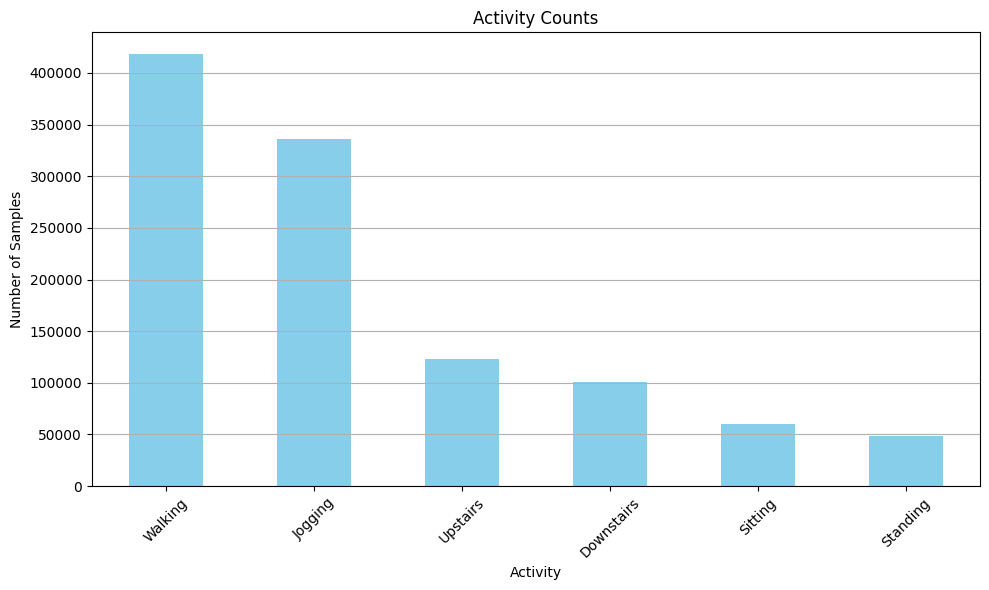

In [14]:
Count how many activity per timestamp
import matplotlib.pyplot as plt

activity_counts = df['activity'].value_counts()

plt.figure(figsize=(10, 6))
activity_counts.plot(kind='bar', color='skyblue')
plt.title('Activity Counts')
plt.xlabel('Activity')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [13]:
#Making windows and making sure each one only contains one activity
import numpy as np
import pandas as pd

def create_windows(df, window_size=50, step=25):
    X = []
    y = []

    for i in range(0, len(df) - window_size, step):
        window = df.iloc[i:i+window_size]
        if len(window['activity'].unique()) == 1:
            x_vals = window[['x', 'y', 'z']].values
            X.append(x_vals)
            y.append(window['activity'].iloc[0])
    
    return np.array(X), np.array(y)
    
X, y = create_windows(df)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (42698, 50, 3)
Shape of y: (42698,)


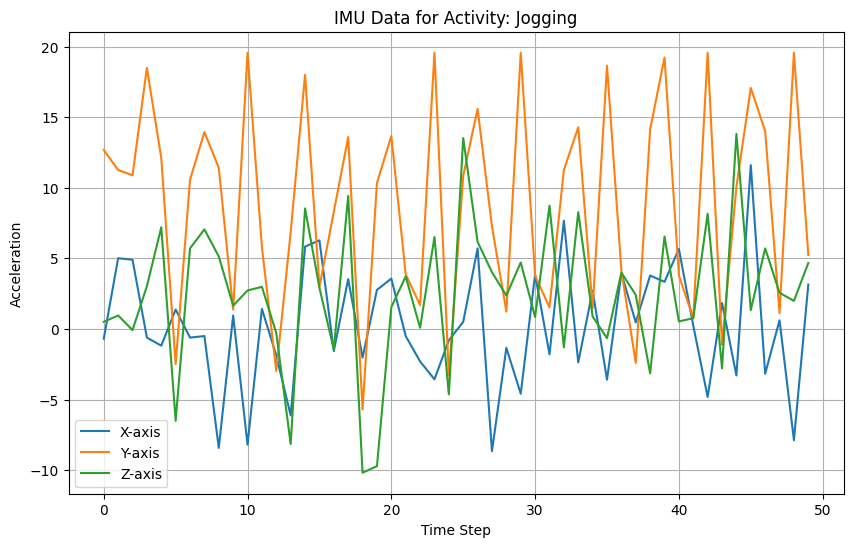

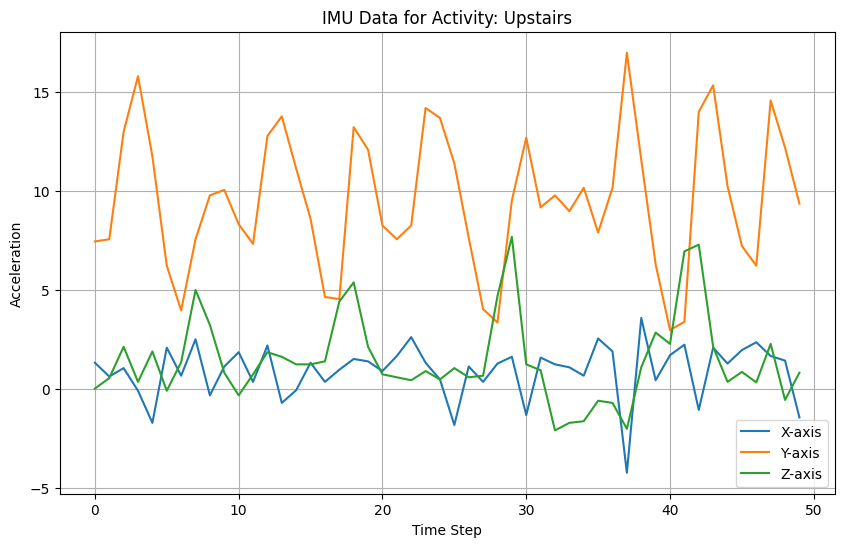

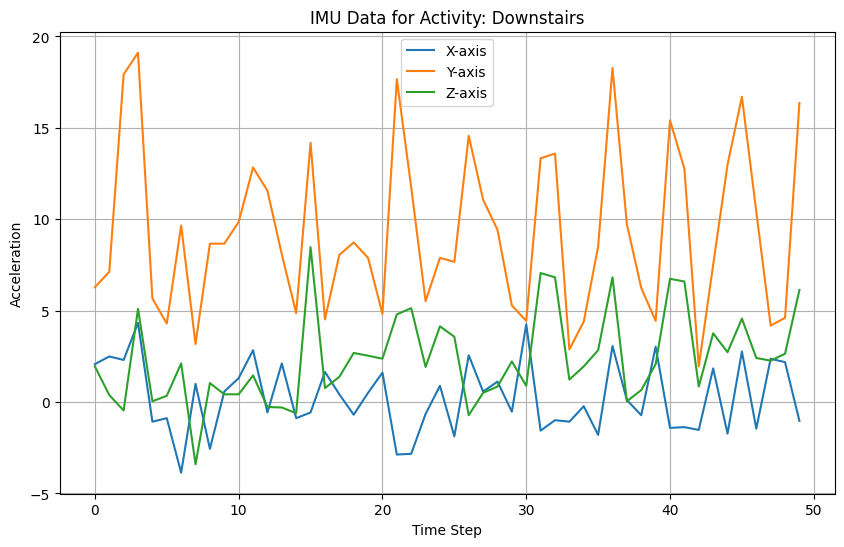

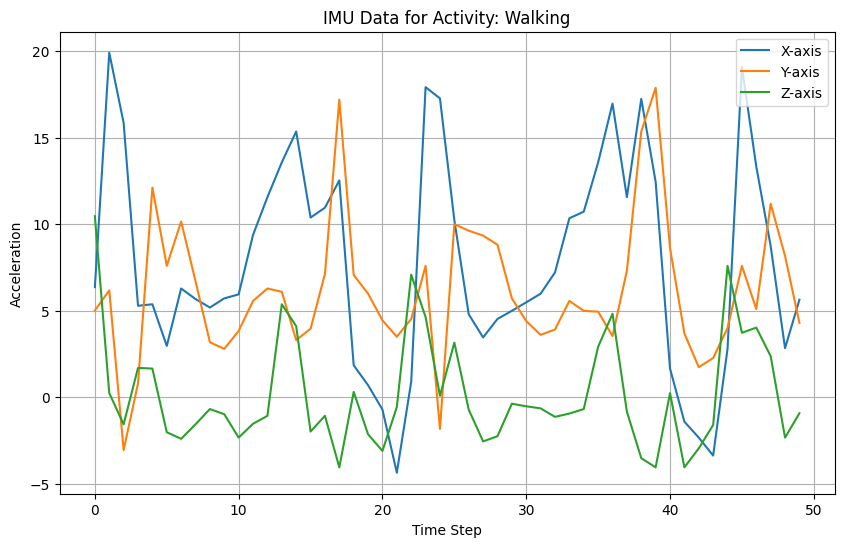

In [6]:
#Plotting random windows to check how values change
import matplotlib.pyplot as plt

def plot_sample_window(X, y, index):
    sample = X[index]
    label = y[index]

    plt.figure(figsize=(10, 6))
    plt.plot(sample[:, 0], label='X-axis')
    plt.plot(sample[:, 1], label='Y-axis')
    plt.plot(sample[:, 2], label='Z-axis')
    plt.title(f'IMU Data for Activity: {label}')
    plt.xlabel('Time Step')
    plt.ylabel('Acceleration')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_sample_window(X, y, index=0)
plot_sample_window(X, y, index=45)
plot_sample_window(X, y, index=150)
plot_sample_window(X, y, index=40000)


Activity sample counts:
 Counter({np.str_('Walking'): 16628, np.str_('Jogging'): 13354, np.str_('Upstairs'): 4672, np.str_('Downstairs'): 3795, np.str_('Sitting'): 2357, np.str_('Standing'): 1892})


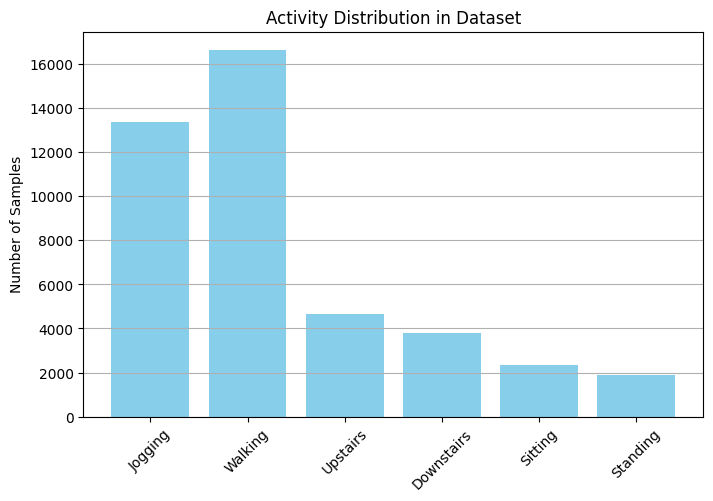

In [12]:
#Count and plot the activity distribution dataset
from collections import Counter
import matplotlib.pyplot as plt


activity_counts = Counter(y)

print("Activity sample counts:\n", activity_counts)

plt.figure(figsize=(8, 5))
plt.bar(activity_counts.keys(), activity_counts.values(), color='skyblue')
plt.xticks(rotation=45)
plt.title("Activity Distribution in Dataset")
plt.ylabel("Number of Samples")
plt.grid(axis='y')
plt.show()


In [9]:
#Converting labels into integers and one got encode the integer labels
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

y_categorical = to_categorical(y_encoded)

#Check how they got mapped
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{i}: {class_name}")


0: Downstairs
1: Jogging
2: Sitting
3: Standing
4: Upstairs
5: Walking


In [10]:
#Reshaping and calculating mean
from sklearn.preprocessing import StandardScaler
import numpy as np


n_samples, timesteps, n_features = X.shape
X_reshaped = X.reshape(-1, n_features)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reshaped)
X_normalized = X_scaled.reshape(n_samples, timesteps, n_features)

print("Before mean =", np.mean(X), ", std =", np.std(X))
print("After mean =", np.mean(X_normalized), ", std =", np.std(X_normalized))

Before normalization: mean = 2.7657156441080186 , std = 6.980074695122415
After normalization: mean = -1.210887211659187e-13 , std = 0.999999999999836
